# Modeling And Machine Learning.

In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_pickle("../data/train_data_wrangle.plk")
test = pd.read_pickle("../data/test_data_wrangle.plk")

In [3]:
print(train['class'].unique(), ' ', test['class'].unique())

[3 2 1]   [2 3 1]


### Applying machine learning techniques.

In [4]:
X_train = train.drop('class',axis=1)
y_train = train['class']

X_test = test.drop('class',axis=1)
y_test = test['class']

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

"""A function used for fitting the classifier, predicting and returning prediction scores."""
def classifier_scores(clf, phase, x, y, to_print=False, class_print=False, func=accuracy_score):
    if phase == 'train':
        clf.fit(x, y)
    clf_predict_scr = func(clf.predict(x), y)
    if to_print:
        print('Accuracy score of classifier on','train' if phase=='train' else phase,'is',clf_predict_scr)
    if class_print:
         print(clf)
    return clf_predict_scr

"""Function to print starts"""
def print_stars(count):
    print(count * '*')

"""function prints out classification report"""
def print_classification_report(clf, X_train, y_train, X_test, y_test):
    print_stars(100)
    print('Training Classification Report\n',classification_report(y_train, clf.predict(X_train)))
    print_stars(100)
    print('Test Classification Report',classification_report(y_test, clf.predict(X_test)))
    print_stars(100)

"""function prints out confusion matrix"""
def print_confusion_matrix(clf, X_train, y_train, X_test, y_test):
    print_stars(100)
    print('Training confusion matrix\n',confusion_matrix(y_train, clf.predict(X_train)))
    print_stars(100)
    print('Test confusion matrix\n',confusion_matrix(y_test, clf.predict(X_test)))
    print_stars(100)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()

train_score = classifier_scores(logreg, 'train', X_train, y_train, True)
test_score = classifier_scores(logreg, 'test', X_test, y_test, True)
#print_classification_report(logreg, X_train, y_train, X_test, y_test)
#print_confusion_matrix(logreg, X_train, y_train, X_test, y_test)

Accuracy score of classifier on train is 0.926033934252
Accuracy score of classifier on test is 0.928529754959


Tuning parameters for logistic regression.

In [7]:
#the grid of parameters to search over
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [8]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':Cs}
logreg = LogisticRegression()

gridSearchClf = GridSearchCV(logreg, parameters)
classifier_scores(gridSearchClf, 'train', X_train, y_train)

c = gridSearchClf.best_params_['C']
print('C value:',c)
logreg_C = LogisticRegression(C = c)

train_score = classifier_scores(logreg_C, 'train', X_train, y_train, True)
test_score = classifier_scores(logreg_C, 'test', X_test, y_test, True)

print_classification_report(logreg_C, X_train, y_train, X_test, y_test)
print_confusion_matrix(logreg_C, X_train, y_train, X_test, y_test)

C value: 1000
Accuracy score of classifier on train is 0.952279957582
Accuracy score of classifier on test is 0.946616102684
****************************************************************************************************
Training Classification Report
              precision    recall  f1-score   support

          1       0.87      0.88      0.88        93
          2       0.93      0.14      0.25       191
          3       0.95      1.00      0.98      3488

avg / total       0.95      0.95      0.94      3772

****************************************************************************************************
Test Classification Report              precision    recall  f1-score   support

          1       0.80      0.81      0.80        73
          2       0.70      0.16      0.26       177
          3       0.95      0.99      0.97      3178

avg / total       0.94      0.95      0.93      3428

******************************************************************************

C of 1000 did a better prediction than default.

Perform cross validation.

In [9]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=10, random_state=42)

logregmodelCV = LogisticRegression(C=c)
logregmodelCV.fit(X_train, y_train)
scorelogregCV = cross_val_score(logregmodelCV, X_train, y_train, cv=kfold)
testscorelogregCV = cross_val_score(logregmodelCV, X_test, y_test, cv=kfold)

print('10-fold cross validation average accuracy on train set is {:.5f}'.format(scorelogregCV.mean()))
print('10-fold cross validation average accuracy on test set is {:.5f}'.format(testscorelogregCV.mean()))

print_classification_report(logregmodelCV, X_train, y_train, X_test, y_test)
print_confusion_matrix(logregmodelCV, X_train, y_train, X_test, y_test)

10-fold cross validation average accuracy on train set is 0.95147
10-fold cross validation average accuracy on test set is 0.94195
****************************************************************************************************
Training Classification Report
              precision    recall  f1-score   support

          1       0.87      0.88      0.88        93
          2       0.93      0.14      0.25       191
          3       0.95      1.00      0.98      3488

avg / total       0.95      0.95      0.94      3772

****************************************************************************************************
Test Classification Report              precision    recall  f1-score   support

          1       0.80      0.81      0.80        73
          2       0.70      0.16      0.26       177
          3       0.95      0.99      0.97      3178

avg / total       0.94      0.95      0.93      3428

************************************************************************

After cross_validation compared with logreg_C accuracy was a bit lower, will stick with logreg_C.

Applying regularizations for logreg_C

In [10]:
print('L2 (default) regularization.')
print_classification_report(logreg_C, X_train, y_train, X_test, y_test)
print_confusion_matrix(logreg_C, X_train, y_train, X_test, y_test)

L2 (default) regularization.
****************************************************************************************************
Training Classification Report
              precision    recall  f1-score   support

          1       0.87      0.88      0.88        93
          2       0.93      0.14      0.25       191
          3       0.95      1.00      0.98      3488

avg / total       0.95      0.95      0.94      3772

****************************************************************************************************
Test Classification Report              precision    recall  f1-score   support

          1       0.80      0.81      0.80        73
          2       0.70      0.16      0.26       177
          3       0.95      0.99      0.97      3178

avg / total       0.94      0.95      0.93      3428

****************************************************************************************************
*************************************************************************

In [11]:
logreg_C_l1 = LogisticRegression(penalty='l1', C=c)

train_score = classifier_scores(logreg_C_l1, 'train', X_train, y_train, True)
test_score = classifier_scores(logreg_C_l1, 'test', X_test, y_test, True)

print_stars(100)
print('L1 regularization')
print_classification_report(logreg_C_l1, X_train, y_train, X_test, y_test)
print_confusion_matrix(logreg_C, X_train, y_train, X_test, y_test)

Accuracy score of classifier on train is 0.957051961824
Accuracy score of classifier on test is 0.949533255543
****************************************************************************************************
L1 regularization
****************************************************************************************************
Training Classification Report
              precision    recall  f1-score   support

          1       0.88      0.87      0.88        93
          2       0.94      0.25      0.39       191
          3       0.96      1.00      0.98      3488

avg / total       0.96      0.96      0.95      3772

****************************************************************************************************
Test Classification Report              precision    recall  f1-score   support

          1       0.76      0.82      0.79        73
          2       0.76      0.25      0.37       177
          3       0.96      0.99      0.97      3178

avg / total       0.94     

With **L2, L1** regularization(s) the model performed bad in predicting the **class 2** in both training and testing phases.

Logistic regression was not a good model here (especially in predicting class 2).

## From the observation we see that we have an unbalanced data set, so will be applying different techniques to get better classification.

In [12]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear', class_weight={1: 10})

train_score = classifier_scores(svm_clf, 'train', X_train, y_train, True)
test_score = classifier_scores(svm_clf, 'test', X_test, y_test, True)

print_classification_report(svm_clf, X_train, y_train, X_test, y_test)
print_confusion_matrix(svm_clf, X_train, y_train, X_test, y_test)

Accuracy score of classifier on train is 0.942735949099
Accuracy score of classifier on test is 0.936406067678
****************************************************************************************************
Training Classification Report
              precision    recall  f1-score   support

          1       0.76      0.92      0.83        93
          2       0.00      0.00      0.00       191
          3       0.95      0.99      0.97      3488

avg / total       0.90      0.94      0.92      3772

****************************************************************************************************
Test Classification Report              precision    recall  f1-score   support

          1       0.65      0.86      0.74        73
          2       0.00      0.00      0.00       177
          3       0.94      0.99      0.97      3178

avg / total       0.89      0.94      0.91      3428

********************************************************************************************

C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Training confusion matrix
 [[  86    0    7]
 [   9    0  182]
 [  18    0 3470]]
****************************************************************************************************
Test confusion matrix
 [[  63    0   10]
 [   3    0  174]
 [  31    0 3147]]
****************************************************************************************************


Did a bad job in predicting **class 2**

Will be picking different ML techniques to get a better estimate of **class 2**.

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)

train_score = classifier_scores(rf_clf, 'train', X_train, y_train, True)
test_score = classifier_scores(rf_clf, 'test', X_test, y_test, True)

print_classification_report(rf_clf, X_train, y_train, X_test, y_test)
print_confusion_matrix(rf_clf, X_train, y_train, X_test, y_test)

Accuracy score of classifier on train is 1.0
Accuracy score of classifier on test is 0.991831971995
****************************************************************************************************
Training Classification Report
              precision    recall  f1-score   support

          1       1.00      1.00      1.00        93
          2       1.00      1.00      1.00       191
          3       1.00      1.00      1.00      3488

avg / total       1.00      1.00      1.00      3772

****************************************************************************************************
Test Classification Report              precision    recall  f1-score   support

          1       0.88      0.99      0.93        73
          2       0.93      0.98      0.95       177
          3       1.00      0.99      1.00      3178

avg / total       0.99      0.99      0.99      3428

****************************************************************************************************
**

In [14]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\rahul\anaconda3\lib\site-packages (0.3.3)
Requirement not upgraded as not directly required: numpy in c:\users\rahul\anaconda3\lib\site-packages (from imbalanced-learn) (1.13.3)
Requirement not upgraded as not directly required: scipy in c:\users\rahul\anaconda3\lib\site-packages (from imbalanced-learn) (0.19.1)
Requirement not upgraded as not directly required: scikit-learn in c:\users\rahul\anaconda3\lib\site-packages (from imbalanced-learn) (0.19.1)


In [15]:
from imblearn.over_sampling import SMOTE # (Synthetic Minority Oversampling Technique)

oversampler=SMOTE(random_state=0)
os_features, os_labels = oversampler.fit_sample(X_train,y_train)

rf_clf_os = RandomForestClassifier(random_state=42)

train_score = classifier_scores(rf_clf_os, 'train', os_features, os_labels, True)
test_score = classifier_scores(rf_clf_os, 'test', X_test, y_test, True)

print_classification_report(rf_clf_os, os_features, os_labels, X_test, y_test)
print_confusion_matrix(rf_clf_os, os_features, os_labels, X_test, y_test)

Accuracy score of classifier on train is 1.0
Accuracy score of classifier on test is 0.992415402567
****************************************************************************************************
Training Classification Report
              precision    recall  f1-score   support

          1       1.00      1.00      1.00      3488
          2       1.00      1.00      1.00      3488
          3       1.00      1.00      1.00      3488

avg / total       1.00      1.00      1.00     10464

****************************************************************************************************
Test Classification Report              precision    recall  f1-score   support

          1       0.86      0.99      0.92        73
          2       0.93      1.00      0.96       177
          3       1.00      0.99      1.00      3178

avg / total       0.99      0.99      0.99      3428

****************************************************************************************************
**

In [16]:
from sklearn.tree import DecisionTreeClassifier

dtree_clf = DecisionTreeClassifier(random_state=0)

train_score = classifier_scores(dtree_clf, 'train', X_train, y_train, True)
test_score = classifier_scores(dtree_clf, 'test', X_test, y_test, True)

print_classification_report(dtree_clf, X_train, y_train, X_test, y_test)
print_confusion_matrix(dtree_clf, X_train, y_train, X_test, y_test)

Accuracy score of classifier on train is 1.0
Accuracy score of classifier on test is 0.992123687281
****************************************************************************************************
Training Classification Report
              precision    recall  f1-score   support

          1       1.00      1.00      1.00        93
          2       1.00      1.00      1.00       191
          3       1.00      1.00      1.00      3488

avg / total       1.00      1.00      1.00      3772

****************************************************************************************************
Test Classification Report              precision    recall  f1-score   support

          1       0.90      0.88      0.89        73
          2       0.95      0.99      0.97       177
          3       1.00      0.99      1.00      3178

avg / total       0.99      0.99      0.99      3428

****************************************************************************************************
**

SMOTE with RandomForestClassifier performed better among SVM, RandomForestClassifier, DecisionTreeClassifier.

In [17]:
# more documentation to be added.

## Plot a ROC curve

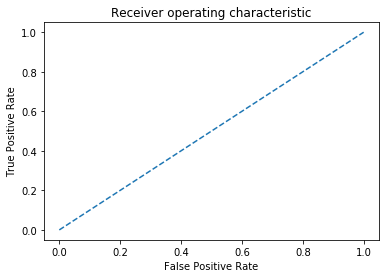

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure()
plt.plot([0, 1], [0, 1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()